In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [355]:
dataset=pd.read_csv('Algerian_forest_fires_dataset.csv')
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [356]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


Data Cleaning

In [357]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [358]:
dataset.loc[:124, 'Region'] = 0        
dataset.loc[125:168, 'Region'] = 1  


In [359]:
df=dataset

In [360]:
df['Region'] = df['Region'].fillna(-1).astype(int)

In [361]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [362]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [363]:
df=df.dropna().reset_index(drop=True)

In [364]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [365]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,0


In [366]:
df=df.drop(122).reset_index(drop=True)

In [367]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [368]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [369]:
#fix spaces in column
df.columns=df.columns.str.strip()

In [370]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [372]:
# other columns to floating type
object_column = [col for col in df.columns if df[col].dtype == 'O']
object_column

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [373]:
for i in object_column:
    if i!='Classes':
        df[i]=df[i].astype(float)
        

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [375]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,-0.144033
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.692220
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,-1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,-1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,0.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [376]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv',index=False)

Exploratory Data Analysis

In [377]:
df_copy=df
df_copy


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,-1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,-1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,-1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,-1


In [378]:
#Drop day, month, year
df_copy=df_copy.drop(columns=['day','month','year'],axis=1)


In [379]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [380]:
#encoding of catagorices in classes
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [381]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.strip().str.contains('not fire'), 0, 1)


In [382]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [383]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

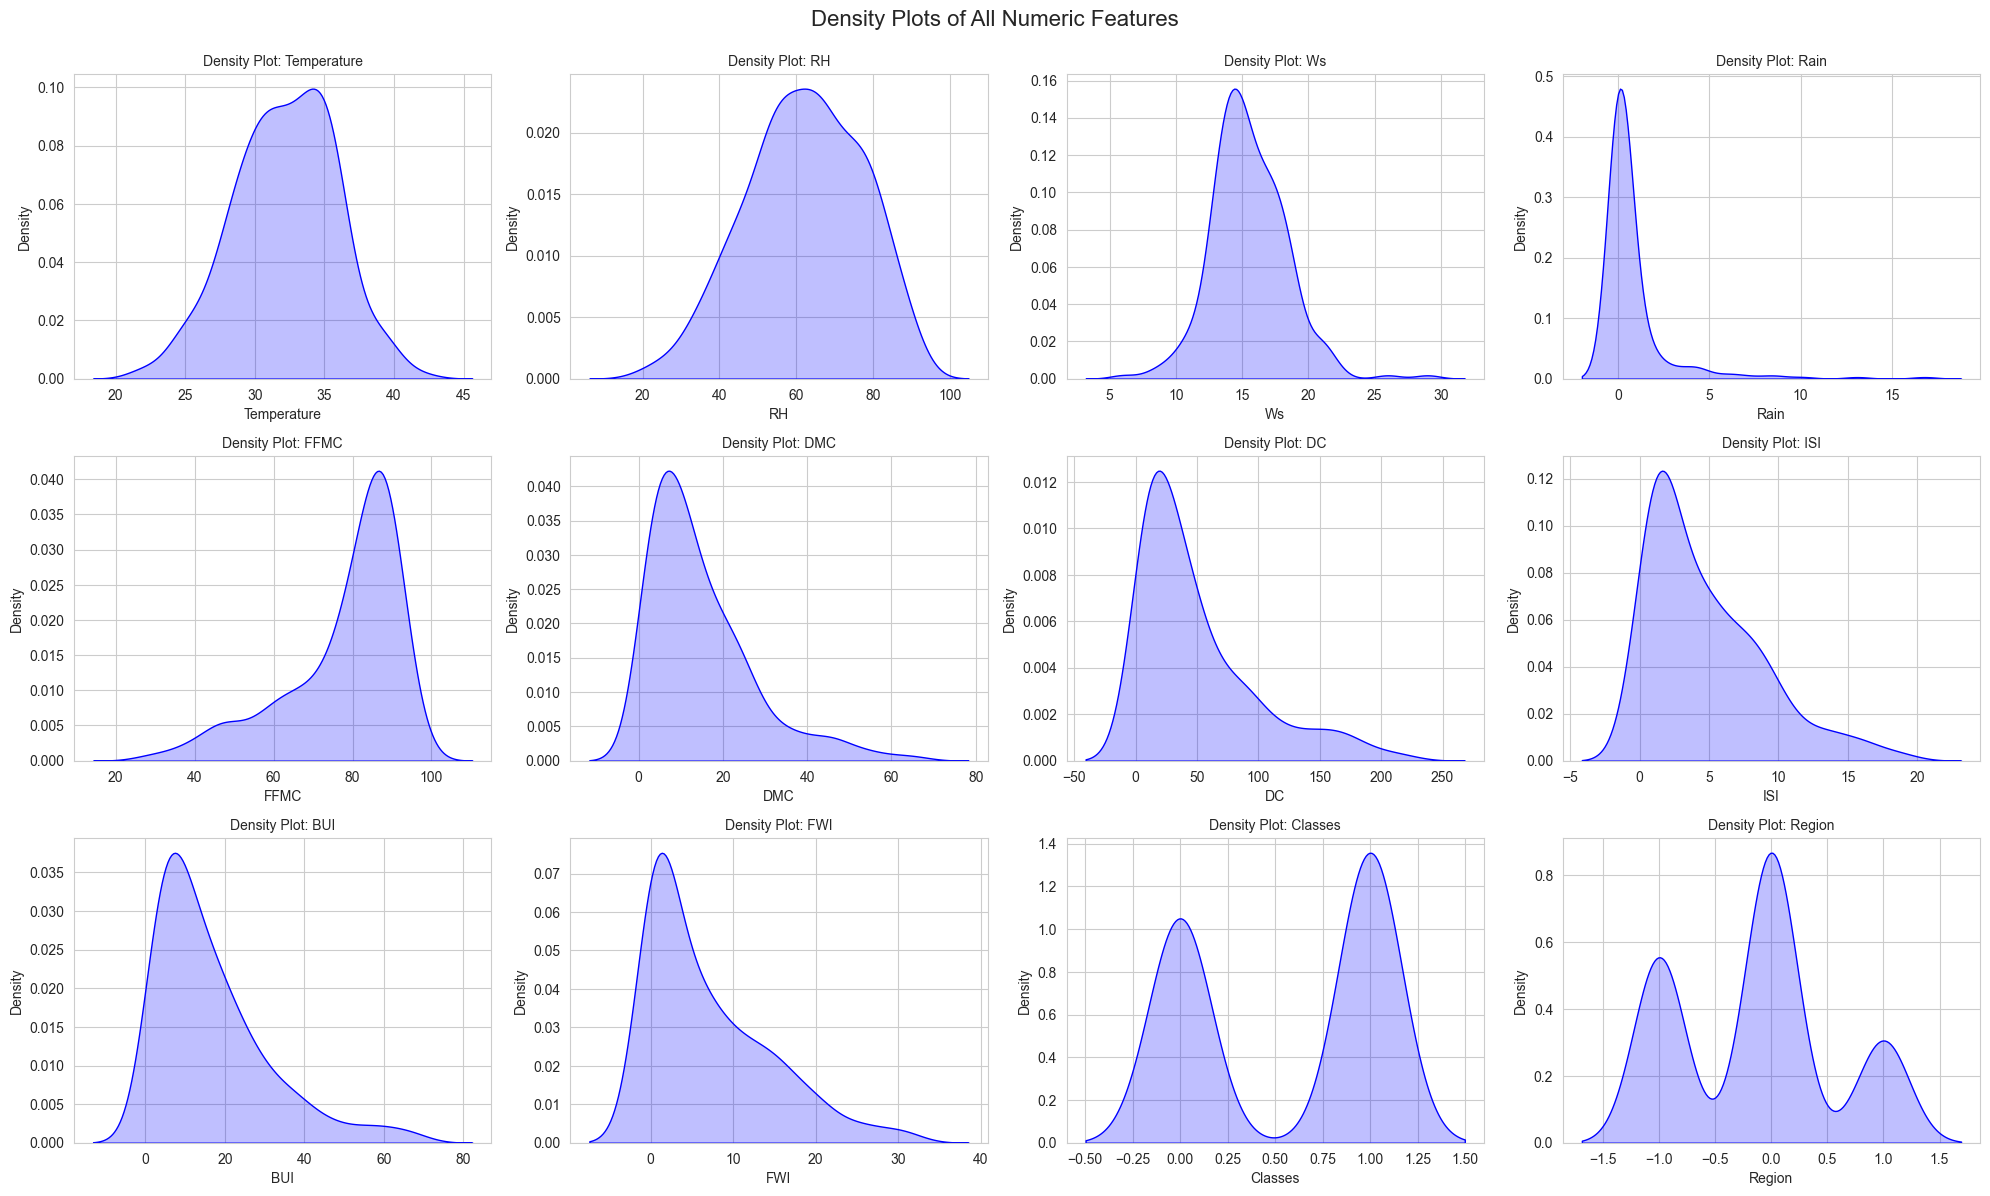

In [384]:
# Create density plots for all numeric features
plt.figure(figsize=(20, 15))  # Big figure

# Select only numeric columns
numeric_columns = df_copy.select_dtypes(include='number').columns

# Loop over each numeric column
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)  # Adjust rows and columns based on total features
    sns.kdeplot(df_copy[column], fill=True, color='blue')
    plt.title(f'Density Plot: {column}', fontsize=10)
    plt.xlabel(column)
    plt.tight_layout()

plt.suptitle("Density Plots of All Numeric Features", fontsize=16, y=1.02)
plt.show()


In [385]:
#precentage of Pie charts
df_copy['Classes'].value_counts(normalize=True)*100

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

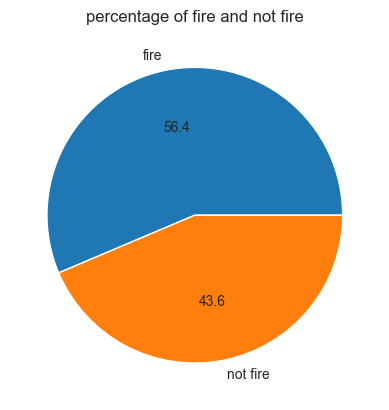

In [386]:
percentage=plt.pie(df_copy['Classes'].value_counts(),labels=['fire','not fire'],autopct='%1.1f')
plt.title('percentage of fire and not fire')
plt.show()

In [387]:
#correlation 
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,-0.124508
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,0.108874
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,0.070673
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,0.145136
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,-0.184921
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,-0.330713
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.266584
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,-0.285694
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,-0.304187
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,-0.312944


<Axes: >

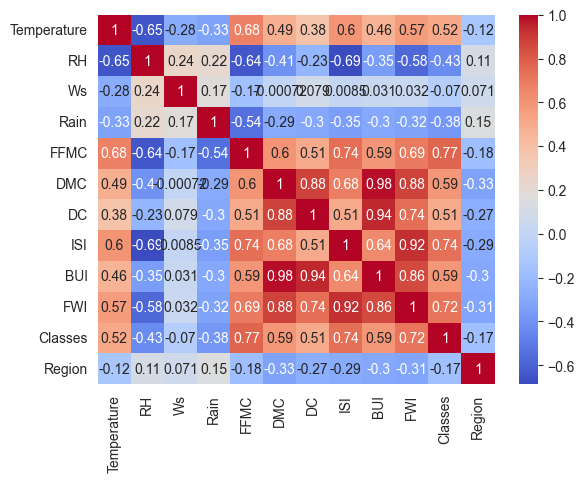

In [388]:
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm')

<Axes: ylabel='FWI'>

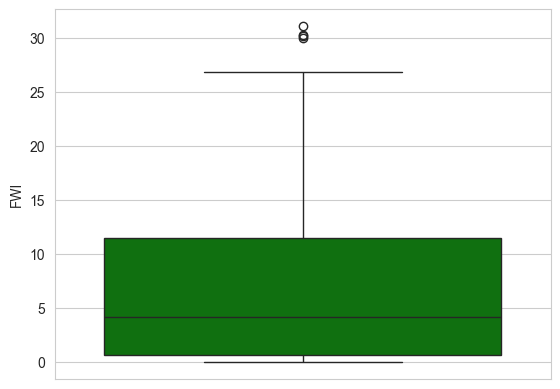

In [389]:
sns.boxplot(df['FWI'],color='g')

In [390]:
df['Classes'] = np.where(df['Classes'].str.strip().str.contains('not fire'),'not fire', 'fire')


Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

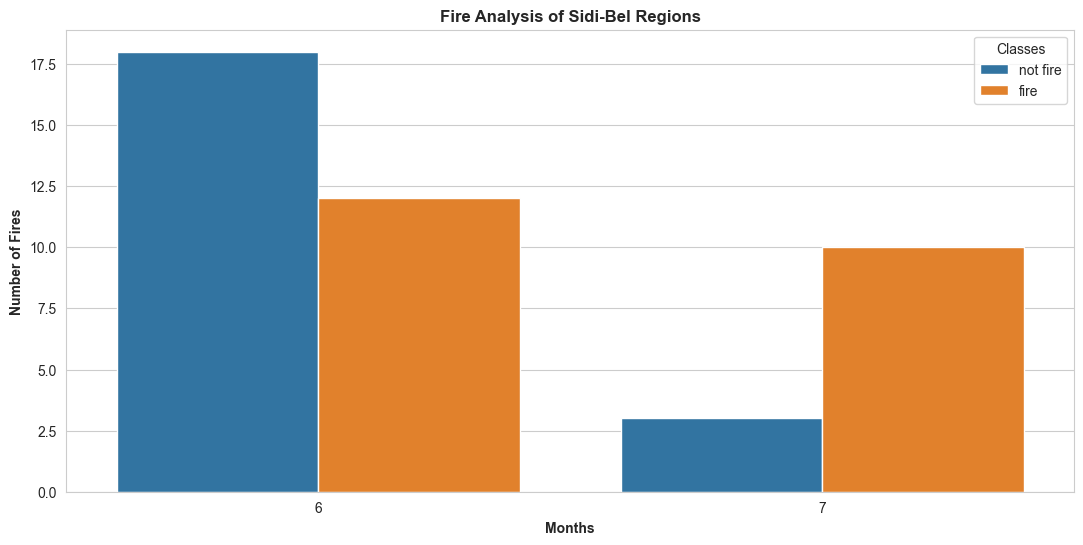

In [391]:
dfTemp = df.loc[df['Region'] == 1]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dfTemp)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions", weight='bold')


Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

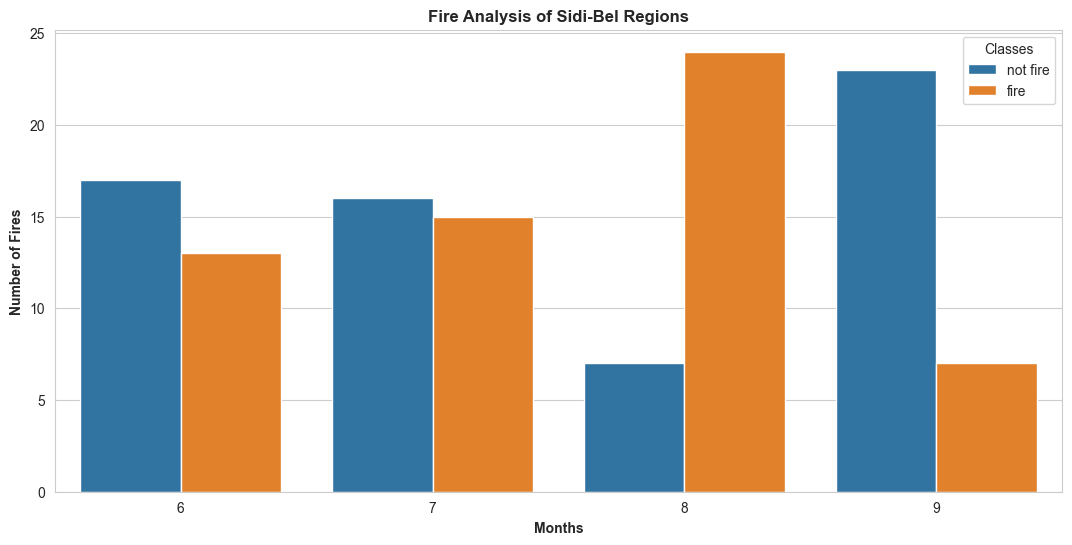

In [392]:
dfTemp = df.loc[df['Region'] == 0]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dfTemp)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions", weight='bold')

it is observed that august and september had the most number of fires for both regions.
Most of the fire happens in August and very few Fires happened in only 2 months june-july

Feature Selection

In [393]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [394]:
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [395]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [396]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [397]:
#encoding
df['Classes']=np.where(df['Classes'].str.strip().str.contains('not fire'),'0','1' )

In [398]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [399]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [400]:
#independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [401]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [402]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [403]:
X_train.shape,X_test.shape

((194, 11), (49, 11))

In [404]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.666832,-0.363524,-0.353372,0.684186,0.485272,0.344520,0.610784,0.447509,0.497727,-0.167453
RH,-0.666832,1.000000,0.268542,0.252659,-0.639914,-0.400913,-0.206873,-0.700103,-0.340127,-0.431097,0.155782
Ws,-0.363524,0.268542,1.000000,0.219551,-0.238520,-0.026332,0.057709,-0.025648,0.008292,-0.106459,0.054774
Rain,-0.353372,0.252659,0.219551,1.000000,-0.588079,-0.300879,-0.306149,-0.351447,-0.310650,-0.377688,0.164768
FFMC,0.684186,-0.639914,-0.238520,-0.588079,1.000000,0.610152,0.511148,0.736174,0.596990,0.765968,-0.225966
DMC,0.485272,-0.400913,-0.026332,-0.300879,0.610152,1.000000,0.884202,0.673975,0.982542,0.592269,-0.331940
DC,0.344520,-0.206873,0.057709,-0.306149,0.511148,0.884202,1.000000,0.489671,0.945585,0.513694,-0.266641
ISI,0.610784,-0.700103,-0.025648,-0.351447,0.736174,0.673975,0.489671,1.000000,0.632169,0.732387,-0.323203
BUI,0.447509,-0.340127,0.008292,-0.310650,0.596990,0.982542,0.945585,0.632169,1.000000,0.593063,-0.301833
Classes,0.497727,-0.431097,-0.106459,-0.377688,0.765968,0.592269,0.513694,0.732387,0.593063,1.000000,-0.207159


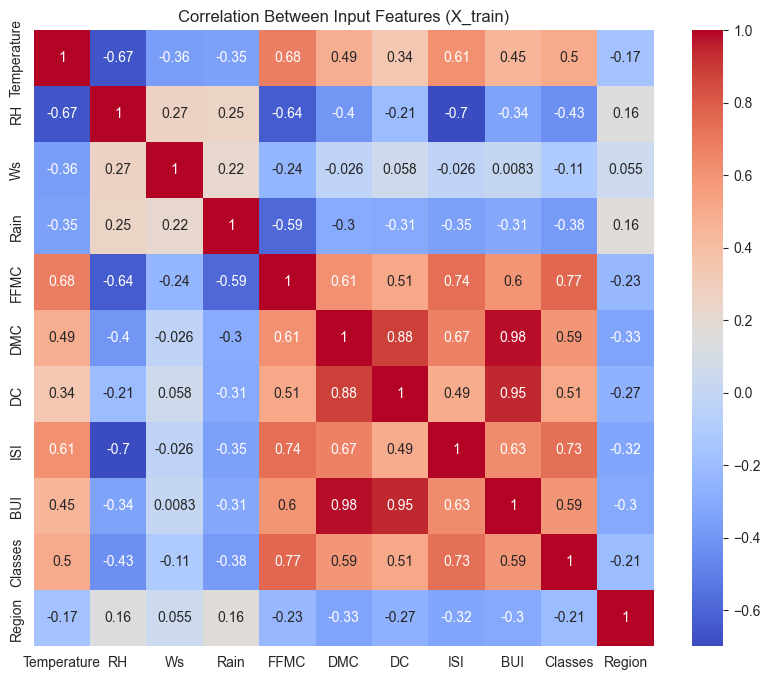

In [405]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Input Features (X_train)")
plt.show()


In [406]:
def Correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                columns=corr_matrix.columns[i]
                col_corr.add(columns)
    return col_corr


In [407]:
correlated_features=Correlation(X_train,0.85)

In [408]:
X_train.drop(correlated_features,axis=1,inplace=True)
X_test.drop(correlated_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [409]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [410]:
X_test_scaled

array([[-0.87109467, -0.29035922, -0.56597023, -0.37365529,  0.7676283 ,
        -0.20437453,  0.64873628,  0.86472409,  0.25725115],
       [ 1.28510776, -1.66266023, -0.91901919, -0.09872814,  0.54860768,
         0.22195514, -0.04531614,  0.86472409,  1.72509595],
       [ 0.20700655,  0.42846512,  1.19927455, -0.37365529,  0.50621659,
        -0.20437453,  0.23230483,  0.86472409,  0.25725115],
       [ 1.01558246, -0.42105456, -0.91901919, -0.23619171,  0.28013079,
         0.04037028, -0.29980203,  0.86472409,  0.25725115],
       [-0.06251876, -0.81314056, -1.6251171 , -0.37365529,  0.77469348,
        -0.41753937,  0.41738548,  0.86472409,  0.25725115],
       [ 0.74605716,  0.10172678, -0.91901919, -0.37365529,  0.73936758,
         0.52196491,  0.48679072,  0.86472409,  0.25725115],
       [-0.06251876,  0.62450812, -1.27206815, -0.05290694, -1.50736006,
        -0.99387393, -1.01698953, -1.15643824,  1.72509595],
       [ 0.74605716,  0.10172678, -0.21292128, -0.37365529,  0

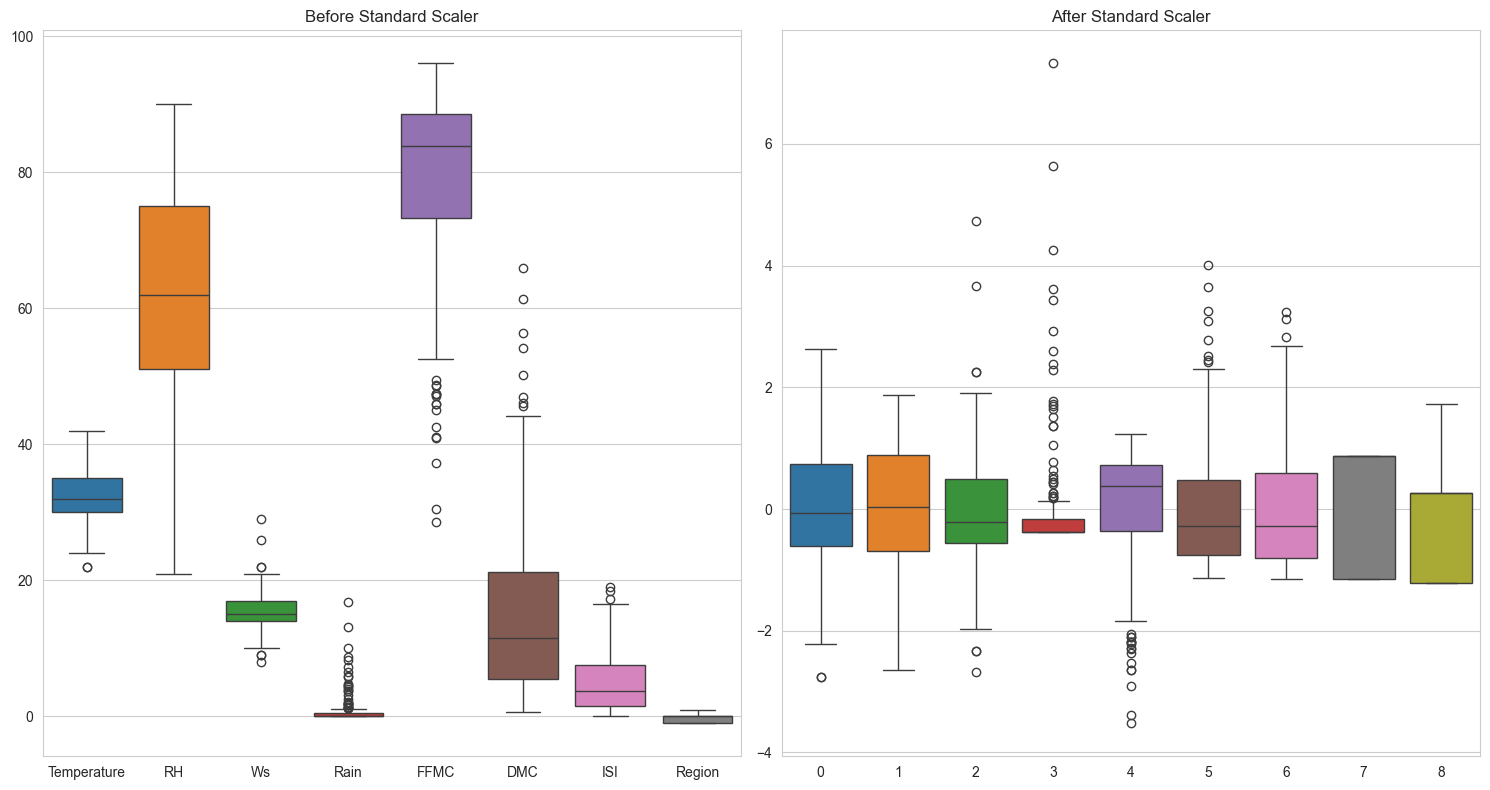

In [411]:
# box plot to understand the effect of standard scaler
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("Before Standard Scaler")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("After Standard Scaler")

plt.tight_layout()
plt.show()

Linear Regression Model

In [412]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [413]:
y_pred=model.predict(X_test_scaled)
y_pred



array([ 9.61878526e+00,  8.12313477e+00,  7.92614639e+00,  6.21375251e+00,
        7.56565374e+00,  1.14516548e+01, -3.34184241e-01,  9.49188017e+00,
        5.84374461e+00,  1.25583484e+01,  9.07712929e-01,  1.31939938e+01,
        7.03929543e+00,  1.56134221e+01,  4.92808599e-01,  1.11241942e+00,
        1.77092618e+00,  2.52510157e+00,  3.93184329e+00,  1.18132770e+00,
        1.06489115e+01,  6.05755757e+00,  6.59304903e+00, -2.56133986e-01,
        2.72687015e+00,  3.86211648e+00,  1.00077962e+01,  9.06683759e-02,
        1.33600333e+00,  1.61451416e+00,  1.35428166e+01,  8.61327646e-01,
       -7.46828592e-01,  1.99160401e+01,  4.18684393e+00,  5.34632064e-01,
        1.12062311e+00,  1.86295351e+01,  2.56095516e+01,  2.40215893e+00,
        7.41203065e+00,  3.55403683e-01, -5.49384959e-01,  1.02274962e+00,
        2.77464105e-03, -1.71572210e-01,  4.34928227e+00,  7.18976412e+00,
       -4.81188988e-01])

In [414]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",r2)

MSE:  0.977668815244075
MAE:  0.7159901817014335
R2:  0.9741289156790782


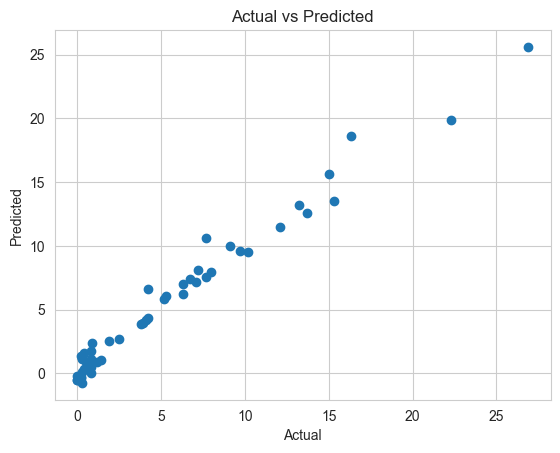

In [415]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

MSE:  2.141118699341501
MAE:  1.1144861330607516
R2:  0.9433416904087941


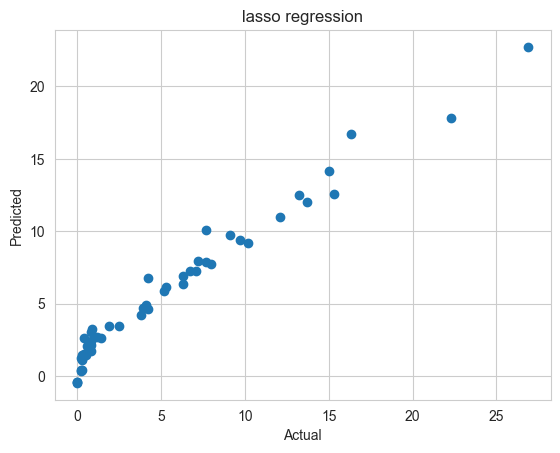

In [416]:
#lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model=Lasso()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("lasso regression")
plt.show()

MSE:  1.0052790769947997
MAE:  0.7303397944241539
R2:  0.9733982925900136


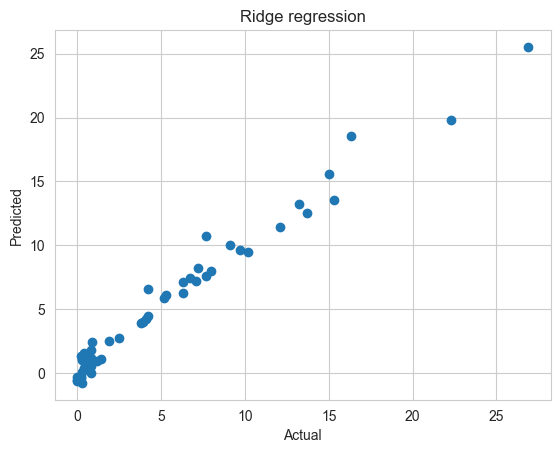

In [417]:
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model=Ridge()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge regression")
plt.show()

MSE:  4.582944970336129
MAE:  1.722600841994681
R2:  0.8787260533250103


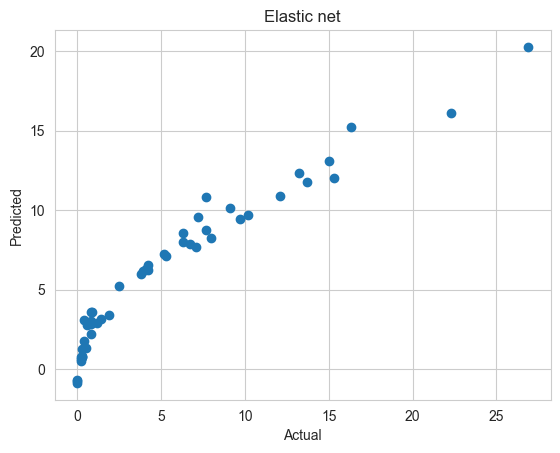

In [418]:
#elastic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model=ElasticNet()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Elastic net")
plt.show()

MSE:  0.1638080555694137
MAE:  0.29161725060101223
R2:  0.9956653092008212


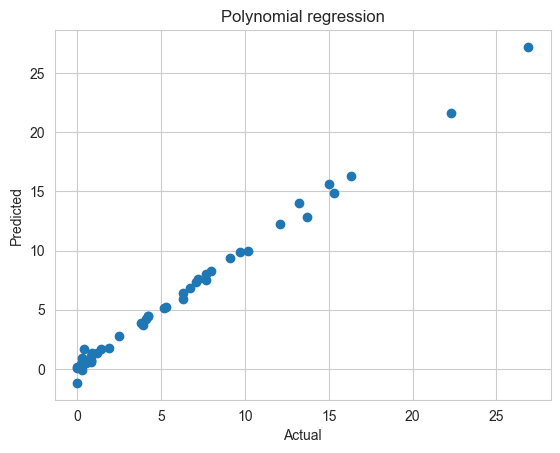

In [419]:
#ploynomial regression using pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model=Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('linear',LinearRegression())
    ])
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Polynomial regression")
plt.show()



Ploynomial model :These values suggest an excellent fit, with the model explaining 99.6% of the variance in the data, a very low mean squared error, and a low mean absolute error.

apply cross validation


In [424]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(model,X_train_scaled,y_train,cv=5)
print("Cross Validation Scores: ",scores)
print("Mean Cross Validation Score: ",scores.mean())
print("Standard Deviation of Cross Validation Score: ",scores.std())

Cross Validation Scores:  [0.95691481 0.9938302  0.99297193 0.90058239 0.9926858 ]
Mean Cross Validation Score:  0.967397022531558
Standard Deviation of Cross Validation Score:  0.03623915739176667


Cross-validation helps us validate the model on multiple subsets of data to get a more realistic estimate of its performance.

Linear Regression provides strong and stable results for this dataset, making it a reliable choice.

Polynomial Regression can potentially improve performance, but requires careful tuning of the degree to avoid overfitting